# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
response_btc_data = requests.get(btc_url)
btc_data = response_btc_data.json()
print(json.dumps(btc_data, indent = 4))

btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]
print(btc_price)

# Fetch current ETH price
# YOUR CODE HERE!]
response_eth_data = requests.get(eth_url)
eth_data = response_eth_data.json()
print(json.dumps(eth_data, indent = 4))

eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]
print(eth_price)

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18591962,
            "total_supply": 18591962,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 33717.0,
                    "volume_24h": 65940622274,
                    "market_cap": 626860092659,
                    "percentage_change_1h": -0.552216013410385,
                    "percentage_change_24h": 6.5693787536947,
                    "percentage_change_7d": 22.943639185617,
                    "percent_change_1h": -0.552216013410385,
                    "percent_change_24h": 6.5693787536947,
                    "percent_change_7d": 22.943639185617
                },
                "CAD": {
                    "price": 42746.4126,
                    "volume_24h": 83599520918.9772,
                    "mark

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca API Key Type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key Type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

Alpaca API Key Type: <class 'str'>
Alpaca Secret Key Type: <class 'str'>


In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-01-05", tz = "America/Los_Angeles").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio.head()

AGG                                      SPY  \
                             open    high     low    close   volume   open   
time                                                                         
2021-01-05 00:00:00-05:00  118.06  118.06  117.75  117.915  5915389  368.1   

                                                            
                            high     low   close    volume  
time                                                        
2021-01-05 00:00:00-05:00  372.5  368.05  371.32  53668865

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.915
Current SPY closing price: $371.32


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18566.00
The current value of your 200 AGG shares is $23583.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

my_crypto_value = my_btc_value + my_eth_value
my_shares_value = my_agg_value + my_spy_value


# Create savings DataFrame
# YOUR CODE HERE!
savings_data = {
    "": ["crypto", "shares"],
    "amount": [my_crypto_value, my_shares_value]
}

df_savings = pd.DataFrame(savings_data)
df_savings.index = df_savings[""]
df_savings = df_savings.drop(columns = [""])

# Display savings DataFrame
display(df_savings)

,amount
,
crypto,46139.35
shares,42149.00


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

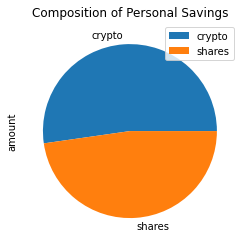

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y = "amount", title = "Composition of Personal Savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
my_savings_value = float(df_savings.sum())
#print(my_savings_value)

# Validate saving health
# YOUR CODE HERE!

if my_savings_value > emergency_fund:
    print(f"Congratulations, you have ${my_savings_value - emergency_fund:0.2f} more than your emergency fund")
elif my_savings_value == emergency_fund:
    print(f"Congratulations, you met your financial goal of ${emergency_fund:0.2f}!")
elif my_savings_value < emergency_fund:
    print(f"You are currently ${emergenc_fund - my_savings_value:0.2} from your financial goal.")

Congratulations, you have $52288.35 more than your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-01-05', tz='America/Los_Angeles').isoformat()
end_date = pd.Timestamp('2021-01-05', tz='America/Los_Angeles').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                       SPY  \
                             open     high     low   close   volume    open   
time                                                                          
2016-01-05 00:00:00-05:00  107.87  108.120  107.87  108.02  2564401  201.40   
2016-01-06 00:00:00-05:00  108.34  108.460  108.22  108.43  2674241  198.34   
2016-01-07 00:00:00-05:00  108.40  108.470  108.21  108.43  2267940  195.33   
2016-01-08 00:00:00-05:00  108.57  108.710  108.35  108.67  3775874  195.19   
2016-01-11 00:00:00-05:00  108.39  108.586  108.34  108.35  2656855  193.01   

                                                              
                             high     low   close     volume  
time                                                          
2016-01-05 00:00:00-05:00  201.90  200.05  201.43   90242524  
2016-01-06 00:00:00-05:00  200.06  197.60  198.79  118917648  
2016-01-07 00:00:00-05:00  198.82  193.59  194.01  174230042  
2016-01-08 00:00:00-05:00  195.85  191.58  191.89  157703921  
2016-01-11 00:00:00-05:00  193.41  189.82  192.08  150051532

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40, 0.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [17]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirty_year.portfolio_data.head()

AGG                                    \
                             open     high     low   close   volume   
time                                                                  
2016-01-05 00:00:00-05:00  107.87  108.120  107.87  108.02  2564401   
2016-01-06 00:00:00-05:00  108.34  108.460  108.22  108.43  2674241   
2016-01-07 00:00:00-05:00  108.40  108.470  108.21  108.43  2267940   
2016-01-08 00:00:00-05:00  108.57  108.710  108.35  108.67  3775874   
2016-01-11 00:00:00-05:00  108.39  108.586  108.34  108.35  2656855   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-05 00:00:00-05:00          NaN  201.40  201.90  200.05  201.43   
2016-01-06 00:00:00-05:00     0.003796  198.34  200.06  197.60  198.79   
2016-01-07 00:00:00-05:00     0.000000  195.33  198.82  193.59  194.01   
2016-01-08 00:00:00-05:00     0.002213  195.19  195.85  191.58  191.89   
2016-01-11 00:00:00-05:00    -0.002945  193.01  193.41  189.82  192.08   

                                                   
                              volume daily_return  
time                                               
2016-01-05 00:00:00-05:00   90242524          NaN  
2016-01-06 00:00:00-05:00  118917648    -0.013106  
2016-01-07 00:00:00-05:00  174230042    -0.024045  
2016-01-08 00:00:00-05:00  157703921    -0.010927  
2016-01-11 00:00:00-05:00  150051532     0.000990

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002072,0.993095,0.987550,0.990832,0.997227,1.006674,1.012487,1.001311,0.997745,0.994866,...,0.987313,0.996272,0.998929,0.997143,1.005222,0.997417,1.009092,0.995581,0.994094,0.998525
2,1.003741,0.992296,0.982781,0.989580,0.999729,0.982749,1.022259,1.007262,0.981598,0.992125,...,0.989585,0.996923,1.000795,1.003549,1.013102,0.996650,1.008250,0.999646,0.996161,0.993227
3,1.002460,0.987807,0.997404,0.980940,0.996148,0.982242,1.014825,1.007926,0.986336,0.990200,...,0.988916,0.989942,1.009370,1.007416,1.004998,1.008939,1.010576,1.004713,0.986638,0.998949
4,1.000825,0.987686,0.993595,0.978513,0.987023,0.983607,1.025762,1.014528,0.982258,0.988280,...,0.986801,1.003029,0.995211,0.995033,1.001897,1.005854,1.017727,1.016365,0.985632,1.012919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,16.939475,17.037509,6.316445,12.394155,3.097807,16.906335,38.910722,17.658947,13.774576,10.098221,...,20.109789,16.327608,18.642433,20.179396,20.980707,6.563119,13.179070,25.281801,53.174261,52.278466
7557,16.874890,16.891568,6.396474,12.497314,3.104016,16.950993,38.738541,17.420198,13.734200,10.078424,...,20.185317,16.200157,18.765273,20.024345,20.766152,6.530304,12.938413,25.076769,53.566709,52.991047
7558,16.969480,16.878983,6.397446,12.560142,3.153856,16.960639,38.994913,17.580837,13.807654,10.060580,...,20.027739,16.212853,18.691883,20.027742,20.715631,6.507976,12.853086,24.972811,53.658179,52.817012
7559,16.760136,16.979865,6.490362,12.537964,3.123657,16.873965,39.020364,17.522562,13.756671,10.035471,...,19.979553,16.167621,18.682711,20.125421,20.840131,6.465549,12.941426,25.179875,53.486944,53.028238


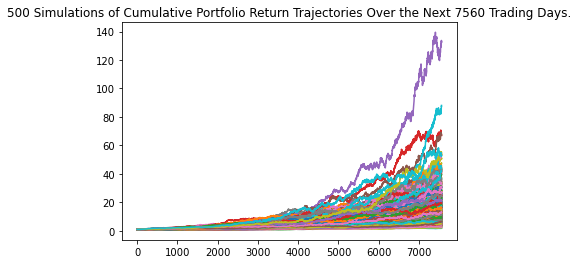

In [19]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_30_year = MC_thirty_year.plot_simulation()

line_plot_30_year.get_figure().savefig("MC_thirty_year_sim_line_plot.png", bbox_inches = "tight")

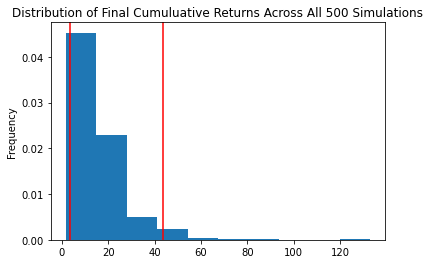

In [20]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_30_year = MC_thirty_year.plot_distribution()

dist_plot_30_year.get_figure().savefig("MC_thirty_year_sim_dist_plot.png", bbox_inches = "tight")

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stats_thirty_year = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(stats_thirty_year)

count           500.000000
mean             15.626990
std              11.922237
min               1.754657
25%               7.941875
50%              12.788868
75%              19.323438
max             132.937640
95% CI Lower      3.780857
95% CI Upper     43.635653
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(stats_thirty_year[8] * initial_investment, 2)
ci_upper = round(stats_thirty_year[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $75617.14 and $872713.06


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment_50pct_increase = initial_investment * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower_2 = round(stats_thirty_year[8] * initial_investment_50pct_increase, 2)
ci_upper_2 = round(stats_thirty_year[9] * initial_investment_50pct_increase, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_50pct_increase} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_2} and ${ci_upper_2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $113425.72 and $1309069.59


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40, 0.60],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011064,1.003672,1.004492,1.006972,0.999980,0.995823,1.006788,1.001060,1.007246,0.998073,...,1.005053,0.997768,1.019257,0.997188,0.994298,1.000953,0.998829,0.994198,1.000699,1.007960
2,1.005061,1.011163,1.012012,1.016924,0.994198,1.002711,1.003301,1.011557,1.006884,0.997780,...,0.993605,0.997131,1.014381,1.002427,0.992056,1.000334,1.000694,1.003443,0.995772,0.999680
3,1.011178,1.021862,1.013323,1.005939,0.994136,0.999505,1.001212,1.005382,1.013040,0.997055,...,0.992233,0.996003,1.018704,0.997309,0.990511,1.001911,1.010476,0.988355,0.996190,0.997161
4,1.013996,1.024204,1.013619,1.007827,1.005849,1.004487,1.015211,1.009577,1.009937,1.004017,...,0.968575,0.994007,1.019647,0.995591,0.997001,0.997802,1.017719,0.984622,0.983532,0.997420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.045780,1.531036,2.117255,1.570567,0.889533,1.594400,2.826175,0.955003,1.602965,1.223051,...,1.708919,1.509380,1.332346,1.823017,1.276662,1.394371,2.351199,1.590150,1.419550,1.807604
1257,1.051753,1.517967,2.122554,1.576473,0.881800,1.605889,2.815049,0.958545,1.598634,1.228482,...,1.720481,1.507849,1.327976,1.816142,1.275189,1.408796,2.319674,1.589614,1.442579,1.845846
1258,1.060118,1.529029,2.156096,1.582477,0.887131,1.618496,2.831343,0.956457,1.586495,1.249395,...,1.709998,1.510669,1.329332,1.823515,1.303460,1.399602,2.322488,1.588202,1.426616,1.868615
1259,1.062075,1.530622,2.149247,1.584283,0.877772,1.613736,2.827624,0.959777,1.584834,1.264643,...,1.680977,1.521551,1.335834,1.826828,1.309458,1.401416,2.296912,1.555830,1.423789,1.857870


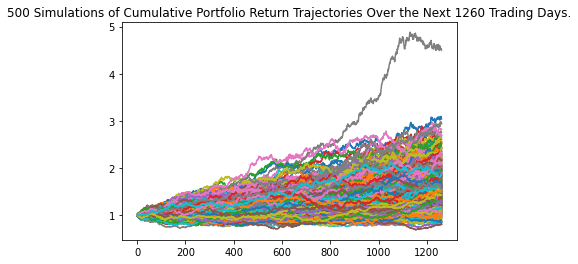

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_5_year = MC_five_year.plot_simulation()

line_plot_5_year.get_figure().savefig("MC_five_year_sim_line_plot.png", bbox_inches = "tight")

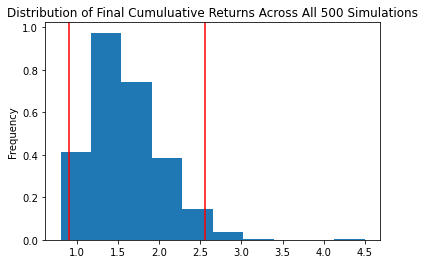

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_5_year = MC_five_year.plot_distribution()

dist_plot_5_year.get_figure().savefig("MC_five_year_sim_dist_plot.png", bbox_inches = "tight")

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stats_five_year = MC_five_year.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(stats_five_year)

count           500.000000
mean              1.599194
std               0.435594
min               0.805473
25%               1.297702
50%               1.531456
75%               1.844440
max               4.499990
95% CI Lower      0.905314
95% CI Upper      2.559561
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_75pct_increase = initial_investment * 1.75
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(stats_five_year[8] * initial_investment_75pct_increase, 2)
ci_upper_five = round(stats_five_year[9] * initial_investment_75pct_increase, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_75pct_increase} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $35000.0 in the portfolio over the next 5 years will end within in the range of $31685.98 and $89584.64


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40, 0.60],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004308,0.991920,1.003289,1.009160,1.001079,1.007789,1.001523,1.001872,1.001225,0.993810,...,1.008645,0.993588,0.996960,1.002147,1.007215,0.998759,0.994659,1.006803,1.020291,1.000756
2,0.989724,0.976782,0.994305,1.006684,1.004567,1.008289,1.008993,1.002354,1.004204,0.983404,...,1.013126,0.980286,1.002503,0.996382,1.003852,1.008620,0.995138,1.009385,1.015560,0.996792
3,0.994805,0.976928,1.003491,1.010383,1.004586,1.012232,1.007618,1.002253,1.008306,0.986455,...,1.014536,0.981465,0.996421,0.996164,1.006716,1.007676,1.001141,1.002357,1.022840,0.992357
4,0.999623,0.972909,0.995676,1.006496,0.998413,1.002321,1.017599,1.003418,1.007755,0.984754,...,1.013857,0.979609,1.003281,0.996712,0.989241,1.006842,0.994344,0.999528,1.015262,0.993031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.774464,3.830097,1.037958,2.288864,1.493932,1.877200,3.093420,2.330092,2.117381,2.432924,...,2.879547,1.462755,2.601363,1.627499,2.353563,2.057801,1.840159,1.826082,2.061093,3.156970
2517,2.813698,3.827357,1.027634,2.320482,1.503807,1.878858,3.103468,2.330643,2.104799,2.452825,...,2.892973,1.470722,2.586072,1.622072,2.355472,2.074616,1.820056,1.817048,2.066086,3.182407
2518,2.840680,3.826016,1.026421,2.329706,1.502492,1.880650,3.131723,2.337135,2.106927,2.466491,...,2.906373,1.461392,2.592494,1.607551,2.361309,2.079101,1.808836,1.837506,2.072974,3.187045
2519,2.841686,3.835145,1.032652,2.361795,1.503565,1.873408,3.146712,2.336315,2.091216,2.478319,...,2.872484,1.457771,2.599117,1.611659,2.368318,2.082097,1.786081,1.846496,2.070176,3.174307


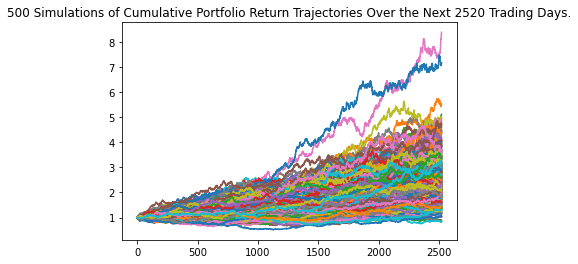

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_10_year = MC_ten_year.plot_simulation()

line_plot_10_year.get_figure().savefig("MC_ten_year_sim_line_plot.png", bbox_inches = "tight")

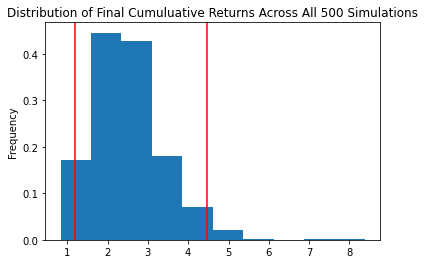

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_10_year = MC_ten_year.plot_distribution()

dist_plot_10_year.get_figure().savefig("MC_ten_year_sim_dist_plot.png", bbox_inches = "tight")

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stats_ten_year = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(stats_ten_year)

count           500.000000
mean              2.510819
std               0.898493
min               0.833935
25%               1.886388
50%               2.386647
75%               2.993020
max               8.381614
95% CI Lower      1.187596
95% CI Upper      4.463343
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_75pct_increase = initial_investment * 1.75

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(stats_five_year[8] * initial_investment_75pct_increase, 2)
ci_upper_ten = round(stats_five_year[9] * initial_investment_75pct_increase, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_75pct_increase} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $35000.0 in the portfolio over the next 10 years will end within in the range of $31685.98 and $89584.64
